In [1]:
# importing the necessary python Libraries
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [2]:
# the dataset column titles were separated by semi-colons
# I ensured the csv has to be cleaned
# the steps below showed cleaning of the dataset
# I searched google and YouTube tutorial on how 
# to clean the dataset by removing the semi-colons, commas
# and to replace them
# 
df = pd.read_csv('winequality_white.csv', sep=';', encoding='utf-8')

# Remove semi-colons, double quotations from the column names
df.columns = df.columns.str.replace(';', '').str.replace('"', '')

# Remove semi-colons from the values
df = df.replace(',', '', regex=True)

# Save the cleaned dataframe to a new CSV file
df.to_csv('white_wine_cleaned.csv', index=False)

In [3]:
# the new dataset to work with
# Read the CSV new file
df = pd.read_csv("white_wine_cleaned.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# check for duplicate and missing values
# this is to ensure I have a good clean dataset
# the dataset has 937 duplicate
# I ensure all the duplicates were removed
df.duplicated().sum()

937

In [6]:
# the code below removes all the duplicate
df.drop_duplicates(keep=False, inplace=True)

In [7]:
# this checked to ensure there are no duplicates
df.duplicated().sum()

0

In [8]:
# this checks for missing values
# when its zero then no missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

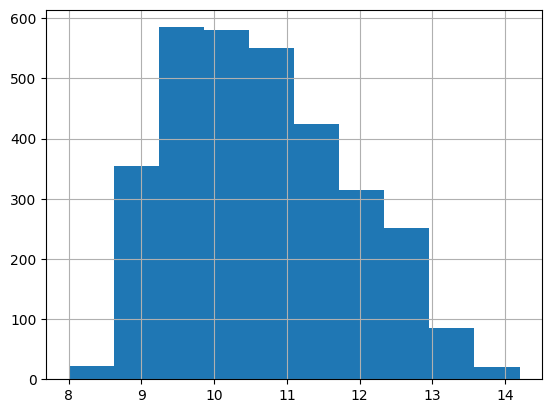

In [9]:
# this shows the histogram of 
# targeted variable "alcohol"
df["alcohol"].hist()

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
# the train/test 
# X = the other variables that make the dataset
# and y which is the targeted variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality']]

y = df['alcohol']

<Axes: >

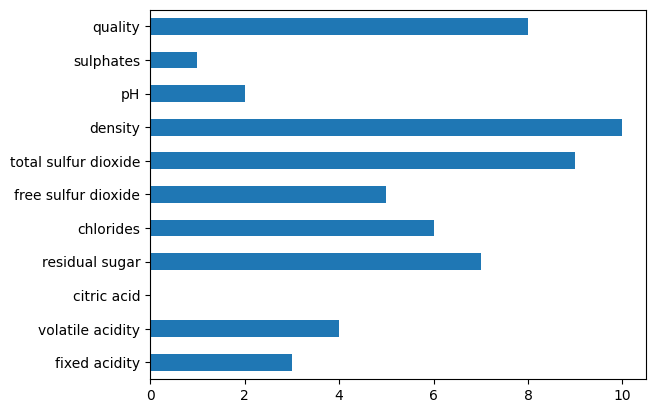

In [12]:
# pip install skfeature-chappers
# sulphates is low and pH, 
# citric acid is absolutely not existed 
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
6,total sulfur dioxide,9012.78
3,residual sugar,2002.95
5,free sulfur dioxide,1935.17
7,density,109.52
10,quality,90.75
2,citric acid,14.50
0,fixed acidity,9.40
9,sulphates,4.67
1,volatile acidity,2.96
8,pH,0.23


The SelectKBest Test

In [14]:
# I used the SelectKBest which is a variable/feature selector 
# (feature selection method)
# helps select the highly important variables which is related
# according to how their scoring features function. 
# Also, it showed the scores in descending form of order. 
# and the higher the feature score the highly important the feature is, 
# in this ann regression analysis
# The information given by the outcome showed 
# that the features that has higher scores 
# i.e total sulfur dioxide, followed by residual sugar, 
# free sulfur dioxide, density etc. 
# I believe this shows that 
# features with the higher scores
# are very much key factor when the train model 
# predicting the target variable which is the quality of the wine.  
# Also it can be seen that the quality (feature) had 
# somehow high score that showed it is of high importance too. 
# The feature Chlorides has a NaN score, 
# which I believe it is either a missing value or 
# possibly an invalid data for the feature.

The Chi-squared Test

In [29]:
# The chi-squared test showed the statistical test 
# which reveal the key factor or connection 
# between the category variables. 
# The test shows the frequencies of the category variables 
# and compared it to the expected frequency independently in this case . 
# Then indicated by measuring the dependency 
# between each feature and the target variable 
# which in this the 'quality' of the wine. 
# And, the higher chi-squared scores reveal there is 
# more correlations between the features (variables) and the targeted variable.

In [15]:
# then train/test split
# create train and test sets of your dataset
# random_state is optional but I chose it 
# to get same results always
# 30% is for the test data, and 70% for training data
# 70% for training and save 30% for temporary variables
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

#then split the temporary variables by 50%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [16]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00,3189.00
mean,6.82,0.28,0.33,5.51,0.05,34.52,136.42,0.99,3.20,0.49,10.65,5.84
std,0.89,0.11,0.12,4.66,0.02,17.41,43.94,0.00,0.15,0.11,1.20,0.90
min,3.80,0.09,0.00,0.70,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.20,0.21,0.27,1.60,0.04,22.00,105.00,0.99,3.10,0.41,9.60,5.00
50%,6.70,0.26,0.32,4.20,0.04,32.00,131.00,0.99,3.19,0.48,10.50,6.00
75%,7.30,0.33,0.39,8.20,0.05,45.00,166.00,1.00,3.30,0.56,11.50,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [17]:
# Build neural network
# 
training_variable_amount = len(X.columns)

# use ModelCheckpoint to always save the best version of the model
# from anywhere from the model's training history (not just the last epoch)
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# have all callbacks in a list
# this time we only have one
callback_list = [mc]

# I encountered error in the Layers.Dense(12, ......)
# which I have used severally and it worked
# so I used Google and ChatGPT to correct the code
# which was 1 unexpected argument
# change it to l1 instead of l
model = keras.Sequential(
    [   # this for Normalization
        layers.BatchNormalization(input_shape=(training_variable_amount,)),
        layers.Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        #layers.Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l1(l=0.1)),
        layers.Dense(8, activation="relu"),

        # add layers Dropout to reduce validation loss
        layers.Dropout(0.1),
        layers.Dense(4, activation="relu"),
        layers.Dense(1)
    ]
)

# the optimizer is selected and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
# compile the neural network, use adam as optimizer
# also I chose learning_rate to be 0.002 
# because higher value can prevent the model 
# from learning properly
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='mse')
#model.compile(optimizer='adam', loss='mse')

# print out the summary of your model
model.summary()

# start training the model
# train for epoch= 300 , 1500, 5000 to check 
# if the model underfit or overfit
# but I would rather use an epochs=1500
# to have well trained model that 
# produce a good learning rate
model.fit(x=X_train, y=y_train, epochs=1500, validation_data=(X_val, y_val), callbacks=callback_list)

c:\Users\Admin\DeepLearningSpringNew2024\DeepLearningSpringNew2024\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 22 (88.00 B)

Epoch 1/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 121.2648 - val_loss: 99.7781
Epoch 2/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.5842 - val_loss: 17.5972
Epoch 3/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.1511 - val_loss: 11.3158
Epoch 4/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5134 - val_loss: 8.7892
Epoch 5/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8141 - val_loss: 6.9801
Epoch 6/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6525 - val_loss: 5.1862
Epoch 7/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1187 - val_loss: 4.3311
Epoch 8/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0405 - val_loss: 3.5151
Epoch 9/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8915 - val_loss: 2.9174
Epoch 10/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2721 - val_loss: 2.4014
Epoch 11/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9898 - val_loss: 2.0187
Epoch 12/1500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4

<Axes: >

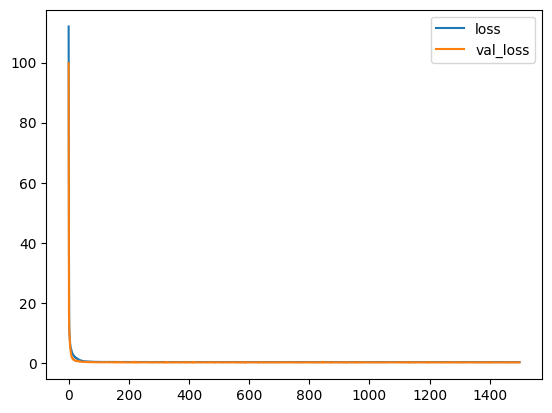

In [18]:
# this will know if our models overfits
# I think the model perform so well  
# and not overfitting  
# as the model learn so well
# shows that the model will predict so well
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [19]:
# load the best version of the model from the file
from keras.models import load_model
model = load_model('best_model.keras')

In [20]:
# these should be as relatively close to each other as possible
# in this case, ~4600 to 4450 is quite close
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
0.16100448369979858

Train data evaluation:
0.18239443004131317


In [21]:
# we need to calculate test predictions based on the TEST DATA SET
# for metrics that follow
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Test True Y,Model Predictions
0,9.60,9.62
1,10.10,10.18
2,9.80,9.70
3,10.00,10.26
4,9.30,9.57
...,...,...
474,11.10,11.20
475,10.70,10.75
476,11.70,11.74
477,10.10,10.03


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

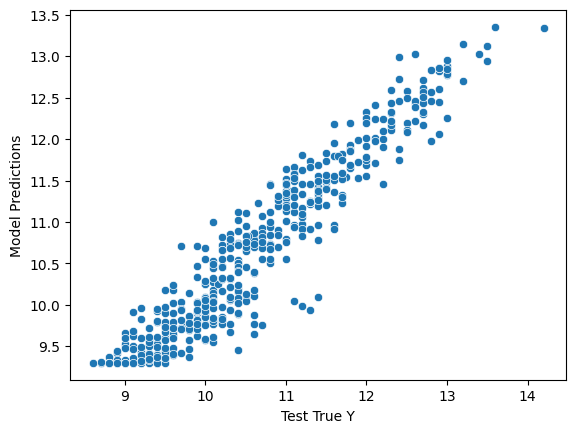

In [22]:
# compare the predictions to real values
# if these follow a diagonal line => they correlate well
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [23]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "%")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "%^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "%")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
0.28 %

MSE
0.13 %^2

RMSE:
0.35 %

R-squared:
0.91

Explained variance score:
0.91


C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\1775748582.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


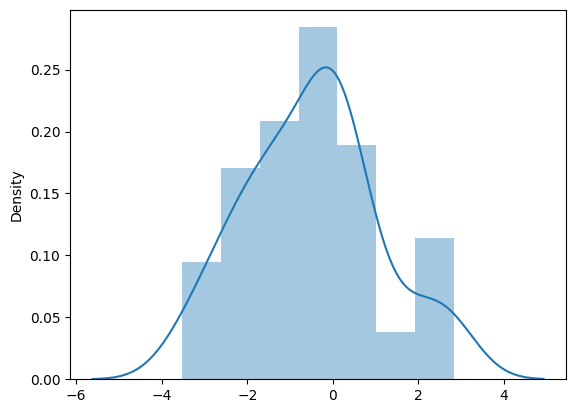

In [24]:
# residual histogram, does our model also follow 
# a normal distribution
# Here, my model which shows the difference 
# between my actual target values (y_test) 
# and the predicted values (test_predictions). 
# And then plot the histogram graph using the Seaborn Library. 
# It showed how it mathematically calculated 
# the residuals subtracting the test_predictions (predicted values) 
# from the very actual targeted values (y_test). 
# Which proceeded to plot the distribution histogram of the residuals 
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,6.20,0.32,0.16,7.00,0.04,30.00,136.00,0.99,3.18,0.47,9.60,6
9,8.10,0.22,0.43,1.50,0.04,28.00,129.00,0.99,3.22,0.45,11.00,6
10,8.10,0.27,0.41,1.45,0.03,11.00,63.00,0.99,2.99,0.56,12.00,5


In [27]:
# then try with random new imaginary data
# one imaginary household without the price data (because that's what we will predict)
# I modified variables which is important 
# this as needed regarding my dataset
# for testing
# which is the alcohol
tester_row = {
    
    'fixed acidity':9.2,
    'volatile acidity': 0.1, 
    'citric acid': 0.19, 
    'residual sugar': 5,
    'chlorides': 0.06, 
    'free sulfur dioxide': 35, 
    'total sulfur dioxide': 135, 
    'density': 0.99,
    'pH': 9.5, 
    'sulphates': 0.1, 
    'quality': 2
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [28]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated volume of alcohol %:")
print(f"{round(float(result), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Estimated volume of alcohol %:
23.27
----------------


C:\Users\Admin\AppData\Local\Temp\ipykernel_7684\618585751.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{round(float(result), 2)}")
